# Splines



In [5]:
import numpy as np 
import matplotlib.pyplot as plt 



In [10]:
# ex18.2, Quadratic Splines

xdata = np.array([3., 4.5, 7.0, 9.0])
ydata = np.array([2.5, 1.0, 2.5, 0.5])

h1,h2,h3 = xdata[1:] - xdata[0:-1]
print(h1,h2,h3)
f1 = ydata[0]
f2 = ydata[1]
f3 = ydata[2]
f4 = ydata[3]
x1 = xdata[0]
x2 = xdata[1]
x3 = xdata[2]

A = np.zeros((6,6))
A[0,0] = h1
A[0,1] = h1**2.
A[1,2] = h2 
A[1,3] = h2**2.
A[2,4] = h3 
A[2,5] = h3**2.
A[3,0] = 1.
A[3,1] = 2*h1 
A[3,2] = -1.
A[4,2] = 1.
A[4,3] = 2*h2 
A[4,4] = -1. 
A[5,1] = 1.
b = np.array([f2-f1, f3-f2, f4-f3, 0, 0, 0])

x = np.linalg.solve(A,b)
print(x)
b1,c1,b2,c2,b3,c3 = x 
print(b1,b2,b3,c1,c2,c3)


1.5 2.5 2.0
[-1.    0.   -1.    0.64  2.2  -1.6 ]
-1.0 -1.0 2.2 0.0 0.64 -1.6


In [11]:
s1 = lambda x: f1 + b1*(x-x1) + c1*(x-x1)**2.
s2 = lambda x: f2 + b2*(x-x2) + c2*(x-x2)**2.
s3 = lambda x: f3 + b3*(x-x3) + c3*(x-x3)**2.

print(s2(5))


0.66


Text(0, 0.5, 'y')

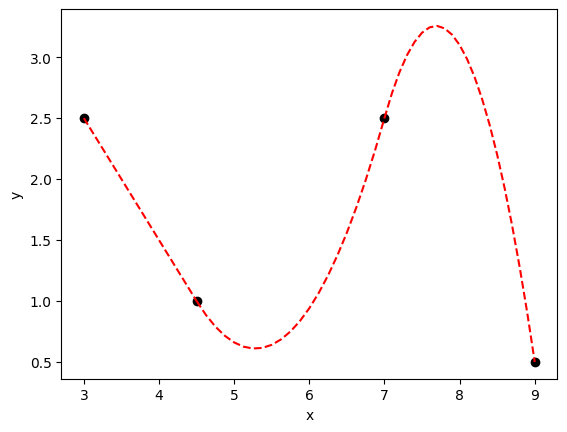

In [13]:
xx1 = np.linspace(xdata[0],xdata[1],21)
yy1 = s1(xx1)
xx2 = np.linspace(xdata[1],xdata[2],21)
yy2 = s2(xx2)
xx3 = np.linspace(xdata[2],xdata[3],21)
yy3 = s3(xx3)

plt.scatter(xdata,ydata,c='k')
plt.plot(xx1,yy1,c='r',ls='--')
plt.plot(xx2,yy2,c='r',ls='--')
plt.plot(xx3,yy3,c='r',ls='--')
plt.xlabel('x')
plt.ylabel('y')

In [15]:
# ex18.3, Cubic Splines

xdata = np.array([3., 4.5, 7.0, 9.0])
ydata = np.array([2.5, 1.0, 2.5, 0.5])

h1,h2,h3 = xdata[1:] - xdata[0:-1]
print(h1,h2,h3)
f1 = ydata[0]
f2 = ydata[1]
f3 = ydata[2]
f4 = ydata[3]
x1 = xdata[0]
x2 = xdata[1]
x3 = xdata[2]
x4 = xdata[3]

A = np.zeros((4,4))
A[0,0] = 1.
A[1,0] = h1 
A[1,1] = 2*(h1+h2)
A[1,2] = h2 
A[2,1] = h2 
A[2,2] = 2*(h2+h3)
A[2,3] = h3 
A[3,3] = 1.
f43 = (f4-f3)/(x4-x3)
f32 = (f3-f2)/(x3-x2)
f21 = (f2-f1)/(x2-x1)
b2 = 3.*(f32 - f21)
b3 = 3.*(f43 - f32)
b = np.array([0., b2, b3, 0.])

x = np.linalg.solve(A,b)
print(x)

c1,c2,c3,c4 = x

b1 = f21 - h1/3.*(2.*c1+c2)
b2 = f32 - h2/3.*(2.*c2+c3)
b3 = f43 - h3/3.*(2.*c3+c4)

d1 = (c2-c1)/(3*h1)
d2 = (c3-c2)/(3*h2)
d3 = (c4-c3)/(3*h3)

print(b1,b2,b3,d1,d2,d3)


1.5 2.5 2.0
[ 0.          0.83954373 -0.76653992  0.        ]
-1.4197718631178708 -0.16045627376425875 0.02205323193916353 0.18656527249683147 -0.21414448669201525 0.12775665399239547


In [16]:
s1 = lambda x: f1 + b1*(x-x1) + c1*(x-x1)**2. + d1*(x-x1)**3.
s2 = lambda x: f2 + b2*(x-x2) + c2*(x-x2)**2. + d2*(x-x2)**3.
s3 = lambda x: f3 + b3*(x-x3) + c3*(x-x3)**2. + d3*(x-x3)**3.

print(s2(5))


1.102889733840304


Text(0, 0.5, 'y')

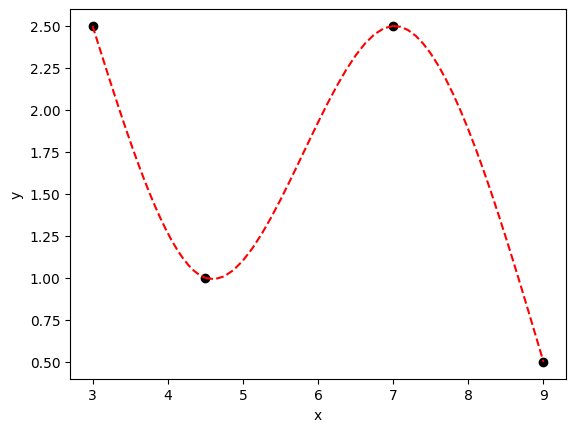

In [17]:
xx1 = np.linspace(xdata[0],xdata[1],21)
yy1 = s1(xx1)
xx2 = np.linspace(xdata[1],xdata[2],21)
yy2 = s2(xx2)
xx3 = np.linspace(xdata[2],xdata[3],21)
yy3 = s3(xx3)

plt.scatter(xdata,ydata,c='k')
plt.plot(xx1,yy1,c='r',ls='--')
plt.plot(xx2,yy2,c='r',ls='--')
plt.plot(xx3,yy3,c='r',ls='--')
plt.xlabel('x')
plt.ylabel('y')

In [6]:
# 18.4, Splines using Buit-in functions
from scipy.interpolate import CubicSpline 

def Runge(x):
    return 1./(1. + 25.*x**2.)

x = np.linspace(-1., 1., 9)
y = Runge(x)

xx = np.linspace(-1., 1)
cs = CubicSpline(x,y,bc_type='natural')
yy = cs(xx)

yR = Runge(xx)


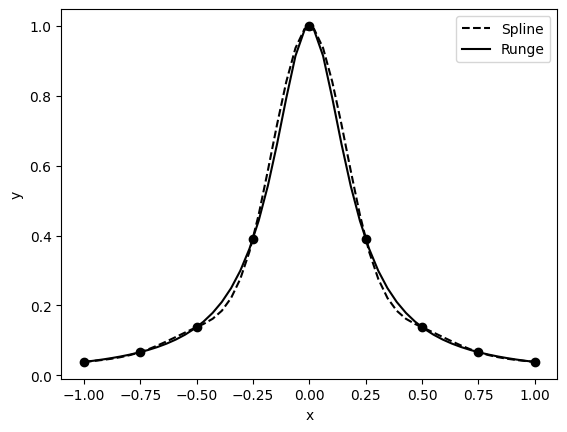

In [13]:
plt.scatter(x,y,c='k',marker='o')
plt.plot(xx,yy,c='k',ls='--',label='Spline')
plt.plot(xx,yR,c='k',label='Runge')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

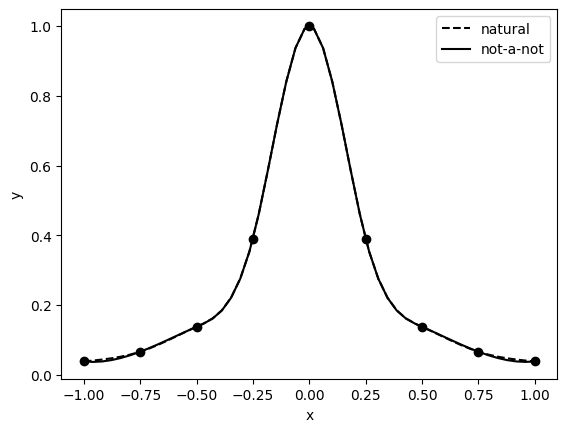

In [14]:
csk = CubicSpline(x,y,bc_type='not-a-knot')
yyk = csk(xx)

plt.scatter(x,y,c='k',marker='o')
plt.plot(xx,yy,c='k',ls='--',label='natural')
plt.plot(xx,yyk,c='k',label='not-a-not')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()